In [14]:
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import numpy as np
import os 
from tensorflow.keras.optimizers import RMSprop
%matplotlib inline

In [16]:
build_dir = '/content/drive/MyDrive/deep learning lab/rps-cv-images'
rock_dir = os.path.join(build_dir,'rock')
paper_dir = os.path.join(build_dir,'paper')
scissors_dir = os.path.join(build_dir,'scissors')
os.listdir(build_dir)

['README_rpc-cv-images.txt', 'scissors', 'rock', 'paper']

In [18]:
pd.DataFrame(data=[len(os.listdir(rock_dir)), len(os.listdir(paper_dir)), len(os.listdir(scissors_dir))], index=['Rock Image', 'Paper Image', 'Scissor Image'], columns=['Total Image'])

,Total Image
Rock Image,726
Paper Image,712
Scissor Image,750


In [19]:
generator = ImageDataGenerator(
    rescale = 1/255.0,
    zoom_range = 0.25,
    rotation_range = 10,
    horizontal_flip = True,
    vertical_flip = True,
    fill_mode = 'nearest',
    validation_split = 0.4
)
train_generator = generator.flow_from_directory(
    build_dir,
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'categorical',
    color_mode = 'rgb',
    subset = 'training'
)
val_generator = generator.flow_from_directory(
    build_dir,
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'categorical',
    color_mode = 'rgb',
    subset = 'validation'
)

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [20]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(3, activation=tf.nn.softmax)
])

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 74, 74, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 36, 36, 64)       

In [22]:
class CallbackAcc(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') >= 0.97):
            print("\nReached %2.2f%% accuracy, training has been stop" %(logs.get('accuracy')*100))
            self.model.stop_training = True
callbacks = CallbackAcc()

In [23]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

In [25]:
historyModel = model.fit(
    train_generator,
    steps_per_epoch = 25,
    epochs = 5,
    validation_data = val_generator,
    validation_steps = 5,
    verbose = 2,
    callbacks = [callbacks])

Epoch 1/5
25/25 - 44s - loss: 1.2576 - accuracy: 0.3597 - val_loss: 1.0757 - val_accuracy: 0.4125 - 44s/epoch - 2s/step
Epoch 2/5
25/25 - 45s - loss: 1.0442 - accuracy: 0.4766 - val_loss: 1.0316 - val_accuracy: 0.4437 - 45s/epoch - 2s/step
Epoch 3/5
25/25 - 42s - loss: 0.9061 - accuracy: 0.6481 - val_loss: 0.8257 - val_accuracy: 0.7563 - 42s/epoch - 2s/step
Epoch 4/5
25/25 - 44s - loss: 0.6151 - accuracy: 0.7738 - val_loss: 0.5671 - val_accuracy: 0.8687 - 44s/epoch - 2s/step
Epoch 5/5
25/25 - 43s - loss: 0.3898 - accuracy: 0.8571 - val_loss: 0.6576 - val_accuracy: 0.7625 - 43s/epoch - 2s/step


[[1. 0. 0.]]
Paper


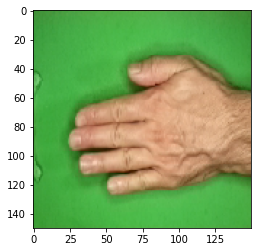

In [26]:
uploaded = os.path.join(paper_dir,'04l5I8TqdzF9WDMJ.png')
img = image.load_img(uploaded, target_size = (150, 150))

imgplot = plt.imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)
images = np.vstack([x])

classes = model.predict(images, batch_size = 10)

print(classes)
if classes[0, 0] == 1:
    print('Paper')
elif classes[0, 1] == 1:
    print('Rock')
else:
    print('Scissors')

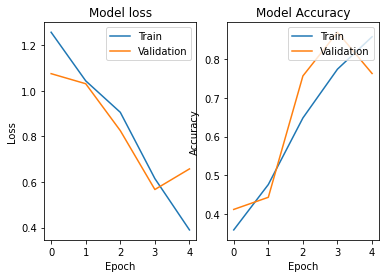

In [27]:
plt.subplot(1, 2, 1)
plt.plot(historyModel.history['loss'])
plt.plot(historyModel.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.subplot(1, 2, 2)
plt.plot(historyModel.history['accuracy'])
plt.plot(historyModel.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()